# Loan Application Status Prediction Project

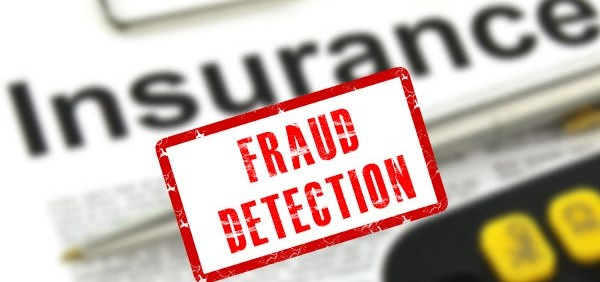

Dataset  

    Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
    In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
    In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Input features

    1.	months_as_customer: Number of months of patronage
    2.	age: the length of time a customer has lived or a thing has existed
    3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
    4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
    5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
    6.	policy_csl: is basically Combined Single Limit
    7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
    8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
    9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
    10.	insured_zip: It is the zip code where the insurance was made
    11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
    12.	insured_education_level: This refers to the Level of education of the customer
    13.	insured_occupation: This refers Occupation of the customer
    14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
    15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
    16.	capital-gains: This refers to profit accrued due to insurance premium
    17.	capital-loss: This refers to the losses incurred due to insurance claims
    18.	incident_date: This refers to the date which claims where made by customers
    19.	incident_type: This refers to the type of claim/vehicle damage made by customer
    20.	collision_type: This refers to the area of damage on the vehicle
    21.	incident_severity: This refers to the extent/level of damage
    22.	authorities_contacted: This refers to the government agencies that were contacted after damage
    23.	incident_state: This refers to the state at which the accident happened
    24.	incident_city: This refers to the city at which the accident happened
    25.	1ncident_location: This refers to the location at which the accident happened
    26.	incident_hour_of_the_day: The period of the day which accident took place
    27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
    28.	property_damage: This refers to whether property was damaged or not
    29.	bodily_injuries: This refers to injuries sustained
    30.	witnesses: This refers to the number of witnesses involved
    31.	police_report_available: This refers to whether the report on damage was documented or not
    32.	total_claim_amount: This refers to the financial implications involved in claims
    33.	injury_claim: This refers to physical injuries sustained
    34.	property_claim: This refers to property damages during incident
    35.	vehicle_claim: This refers to property damages during incident
    36.	auto_make: This refers to the make of the vehicle
    37.	auto_model: This refers to the model of the vehicle
    38.	auto_year: This refers to the year which the vehicle was manufactured
    39.	_c39:

Output label  
    
       fraud_reported
    

Aim: 
 
     Design a a predictive model that predicts if an insurance claim is fraudulent or not (Classification problem).


In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [20]:
# load the dataset

ins=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv")


ins.columns=['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable',
             'policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation',
            'insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type',
            'incident_severity','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day',
            'number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount',
            'injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']
ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


# Data pre-processing, Feature engineering & EDA

In [21]:
# create a copy of the dataset for analysis

ins_df1=ins.copy()

In [22]:
ins_df1.shape

(999, 39)

In [23]:
# check for duplicates

duplicates=ins_df1.duplicated()

print('No. of duplicates in the dataset: ', ins_df1.duplicated().sum())
print('Index of duplicates in the dataset: ', ins_df1[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


In [24]:
ins_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In [25]:
ins_df1.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

Observation:  

    There are 999 records in the dataset with 39 columns 
    There are 91 nulls in 'authorities_contacted'  
    The datatypes of columns are: float64(1), int64(17), object(21)

In [26]:
# fill nulls

ins_df1['authorities_contacted'].fillna('Other',inplace=True)

In [27]:
ins_df1.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are no more nulls in the dataset

In [28]:
# check number of unique values in each column

unique=ins_df1.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
months_as_customer,391
age,46
policy_number,999
policy_bind_date,950
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,990
umbrella_limit,11
insured_zip,994


In [29]:
# take the count of each unique value in each column

for i in ins_df1.columns:
    print(ins_df1.value_counts(ins_df1[i]),'\n')

months_as_customer
194    8
128    7
101    7
230    7
254    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: count, Length: 391, dtype: int64 

age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
27    24
47    24
48    24
57    16
55    14
25    14
49    14
53    13
50    13
24    10
61    10
54    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: count, dtype: int64 

policy_number
100804    1
687698    1
674570    1
676255    1
678849    1
         ..
412703    1
413192    1
413978    1
414519    1
999435    1
Name: count, Length: 999, dtype: int64 

policy_bind_date
01-01-2006    3
05-08-1992    3
28-04-1992    3
03-01-2004    2
29-01-1998    2
             ..
11-01-2010    1
11-02-1991    1
11-02-1994    1
11-02-2003    1
31-12-2012    1
Name: count, Le

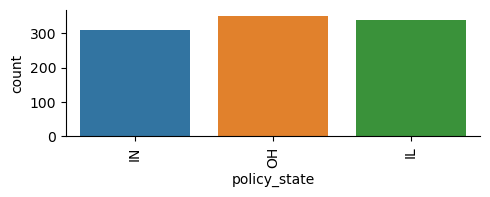

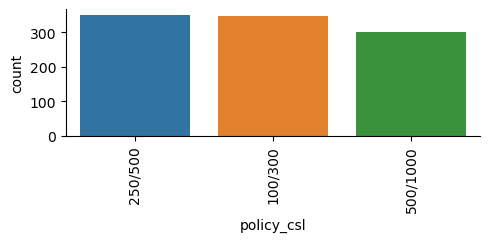

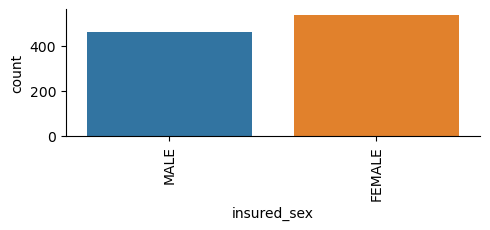

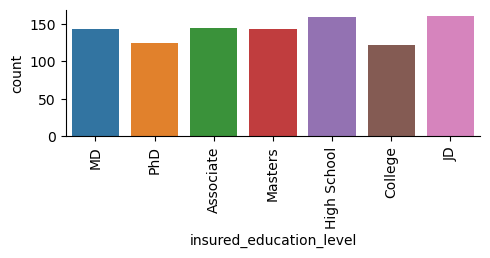

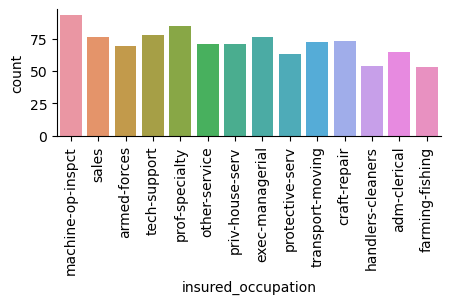

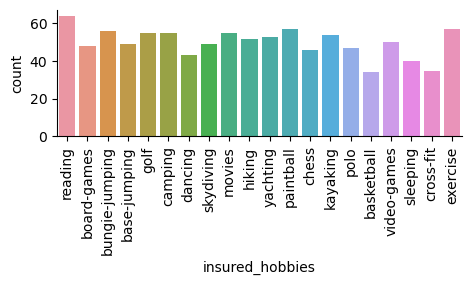

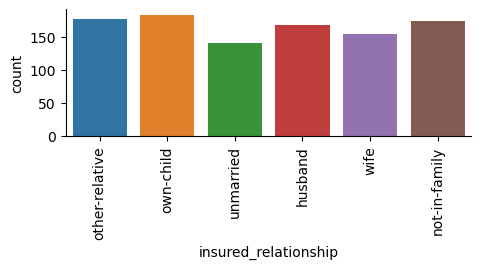

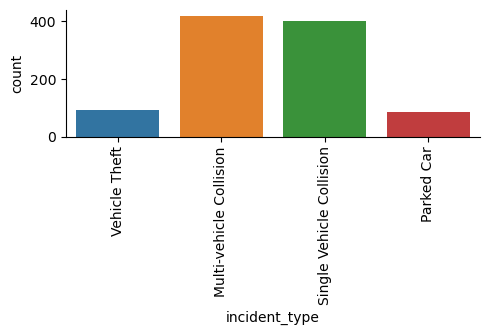

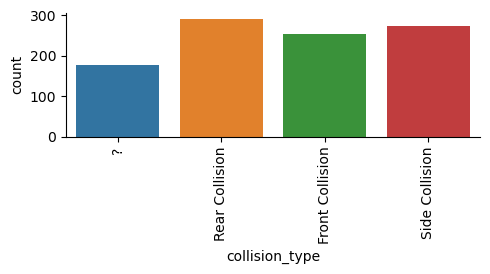

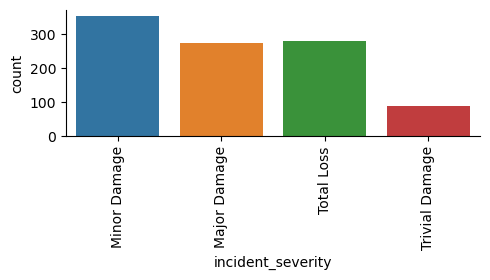

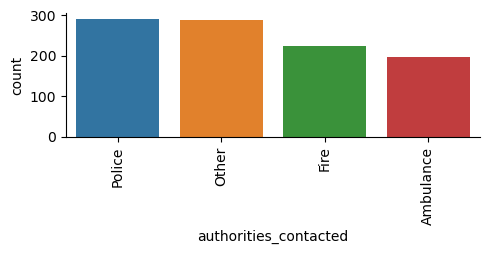

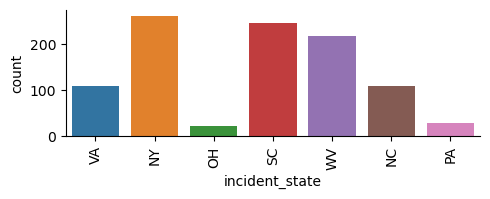

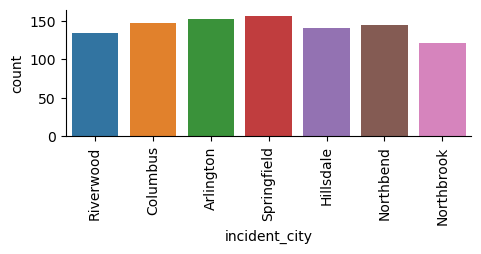

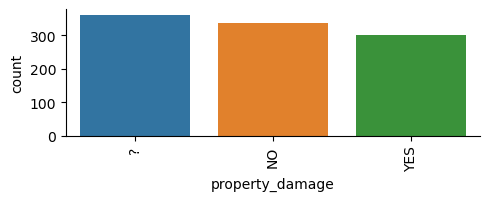

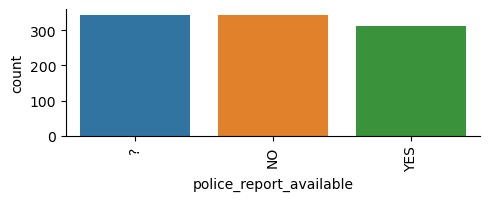

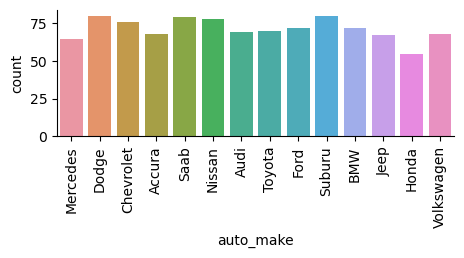

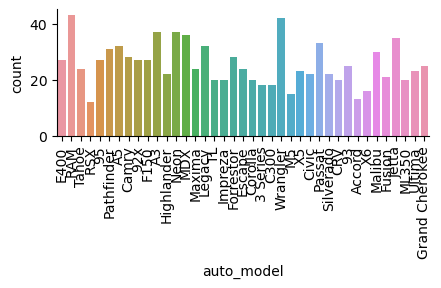

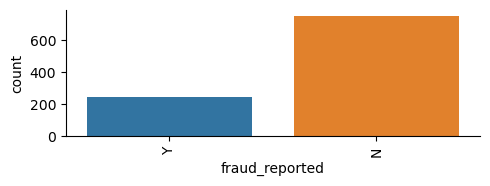

In [30]:
# view the frequency of categorical features

cat=ins_df1.select_dtypes(include='object')
cat1=cat.drop(['policy_bind_date','incident_date','incident_location'],axis=1)
for col in cat1.columns:
    sns.catplot(x=col,data=ins_df1,kind='count',height=2,aspect=2.5)
    plt.xticks(rotation=90)
    plt.show()

Observation:  

    There are 999 records and 39 columns in the dataset
    In most cases, umbrella_limit is zero.There wont be any extra insurance that provides protection beyond existing limits and coverages of other policies
    Dataset represents male and female population equally. No gender bias will affect the data analysis.
    machine-op-inspct is the most insured occupation
    Capital gain and loss of clients are 0 in most cases
    Majority claims where made by customers on 02-02-2015 (28 claims)
    Multi-vehicle and single vehicle Collisions are the common incidents reported by clients for insurance claim out of which rear collisions are most commonly reported
    In most cases, minor damage was reported
    The type of claim/vehicle damage made by customer were mostly reported from Springfield, NY
    In 580 cases, single vehicle was involved in the damage
    Out of 999 cases, 246 insurance claim frauds were reported
    

In [41]:
# percentage of insurance claim frauds reported

frauds= len(ins_df1[ins_df1['fraud_reported']=='Y'])/len(ins_df1['fraud_reported'])*100
genuine= len(ins_df1[ins_df1['fraud_reported']=='N'])/len(ins_df1['fraud_reported'])*100

print(f'Rate of genuine insurance claim: {genuine:.2f}%')
print(f'Rate of fraud insurance claim: {frauds:.2f}%')

Rate of genuine insurance claim: 75.38%
Rate of fraud insurance claim: 24.62%


In [31]:
ins_df1.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


Observation:  

    Average age of customers who have claimed for insurance is 38.93 yrs having range of 19-64 yrs
    Average policy_deductable (the amount of money that a customer is responsible for paying toward an insured loss) is 1136.1
    Average policy_annual_premium is 1256.25
    Average total_claim_amount is 52743.07

In [36]:
# details of the customer who has availed for highest insurance claim

high_amt=ins_df1[ins_df1['total_claim_amount']==ins_df1['total_claim_amount'].max()]
pd.set_option('display.max_columns',None)
high_amt

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
10,447,61,214618,29-05-1999,OH,100/300,2000,1137.16,0,615561,FEMALE,High School,exec-managerial,skydiving,other-relative,0,-51000,15-02-2015,Multi-vehicle Collision,Front Collision,Major Damage,Fire,SC,Springfield,5971 5th Hwy,21,3,YES,1,2,YES,114920,17680,17680,79560,Audi,A3,2006,N


Observation:  

    Customer with policy_number - 214618 has bagged the highest insurance claim of 114920 which was claimed on 15-02-2015. Insurance was claimed for Multi-vehicle Front Collision involving 3 vehicles at Springfield, NY on 21 st hour of the day (night time) and major damage was done to her Audi A3 (2006 make). 
    The case was genuine and not a fraud claim.

In [37]:
# details of the customer who has availed for lowest insurance claim

low_amt=ins_df1[ins_df1['total_claim_amount']==ins_df1['total_claim_amount'].min()]
pd.set_option('display.max_columns',None)
low_amt

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
774,89,32,266247,17-01-2015,IN,100/300,2000,1482.53,0,620358,FEMALE,MD,tech-support,kayaking,not-in-family,49100,-45100,23-01-2015,Parked Car,?,Trivial Damage,Police,WV,Northbrook,8492 Weaver Hwy,5,1,YES,1,2,?,100,10,20,70,Audi,A3,2002,N


Observation:  

     Customer with policy_number - 266247 has bagged the lowest insurance claim of 100 which was claimed on 23-01-2015. Insurance was claimed for Trivial Damage to her parked car (Audi A3 (2002 make)) at West Virginia on 5th hour of the day (early morning). The case was genuine and not a fraud claim.
    

In [38]:
# drop policy_number as its not necessary for further eda

ins_df1.drop('policy_number',axis=1,inplace=True)

In [53]:
ins_df1['incident_date']=pd.to_datetime(ins_df1['incident_date'])

In [54]:
# generate year, month, day columns from 'date' column

ins_df1['date'],ins_df1['month'],ins_df1['year']=ins_df1['incident_date'].dt.day, ins_df1['incident_date'].dt.month,ins_df1['incident_date'].dt.year
ins_df1.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,date,month,year
0,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1,21,1,2015
1,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,22,2,2015
2,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,10,1,2015
3,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,Other,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,17,2,2015
4,256,39,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,1,2,1,2015


In [42]:
# encode loan status

le=LabelEncoder()
ins_df1['fraud_reported']=le.fit_transform(ins_df1['fraud_reported'])
ins_df1.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
1,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
2,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
3,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,Other,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
4,256,39,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,1


N (genuine) is encoded as 0   
Y (fraud) is encoded as 1

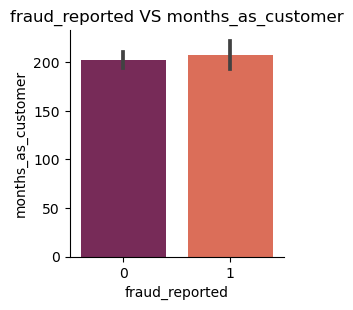

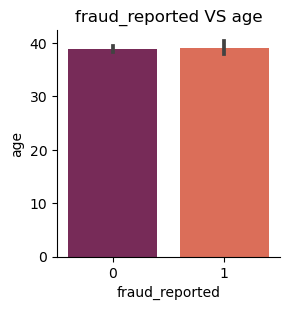

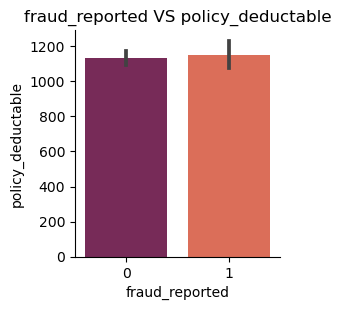

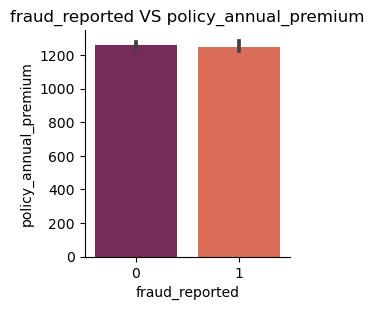

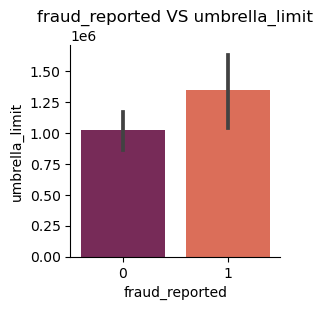

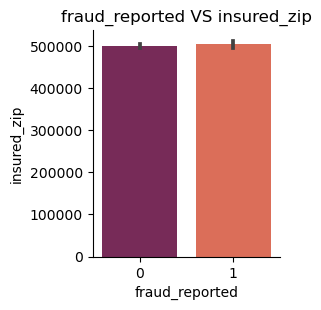

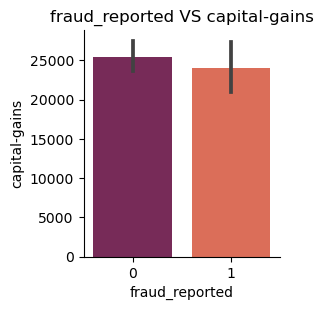

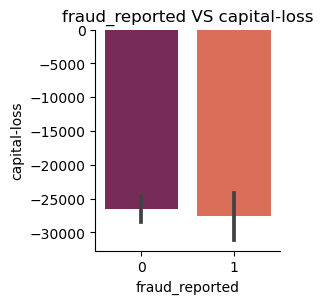

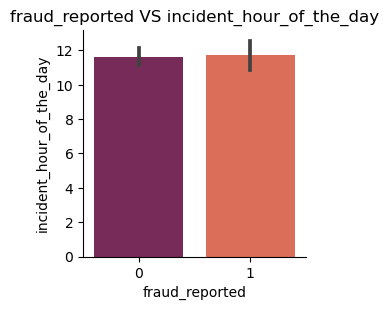

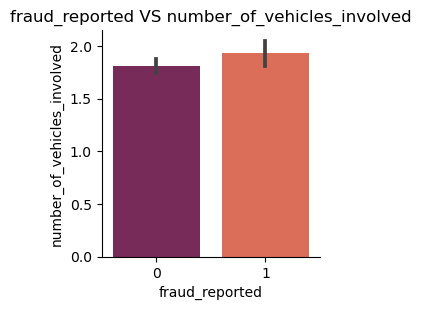

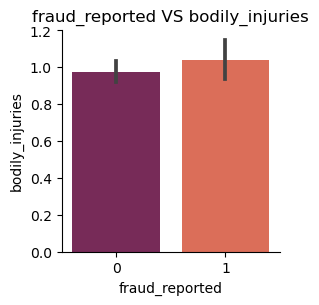

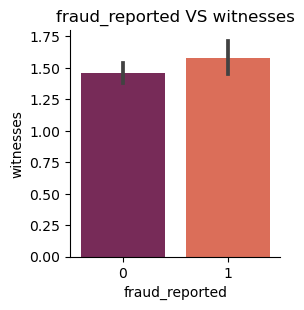

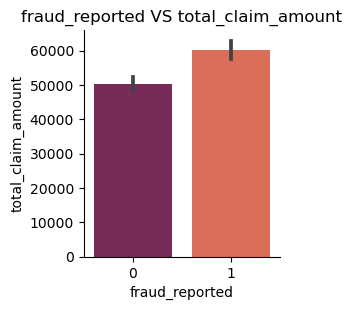

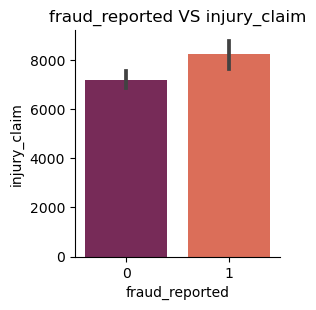

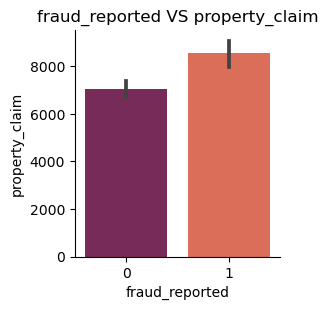

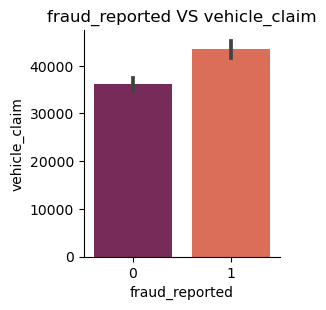

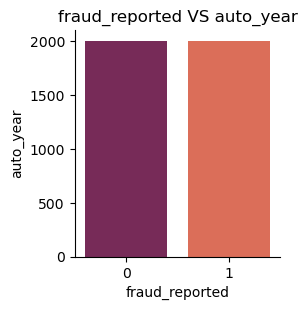

In [44]:
# plot fraud_reported vs numerical features

num=ins_df1.select_dtypes(include=['float','int'])

for i in num.columns[:-1]:
    
    sns.catplot(x='fraud_reported',y=i, data=ins_df1,kind='bar',height=3,palette='rocket')
    plt.title(f'Fraud reported VS {i}')
    plt.show()

Observation:  

    Frauds were not related to the number of months of patronage or age or policy_deductable or policy_annual_premium,or insured_zip or capital loss or incident hour of the day or auto year.
    Frauds were reported more when umbrella_limit was high, capital_gains were less, more vehicles are involved, total claim amount is high, injury claim is high, vehicle claim is high, property claim is high. 
    

In [55]:
# filter out fraud claims for analysis

fraud=ins_df1[ins_df1['fraud_reported']==1]
fraud.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,date,month,year
0,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1,21,1,2015
2,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,10,1,2015
4,256,39,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,1,2,1,2015
13,180,38,28-12-1998,OH,250/500,2000,1301.13,0,476685,FEMALE,College,machine-op-inspct,board-games,not-in-family,41300,-55500,2015-01-15,Single Vehicle Collision,Rear Collision,Total Loss,Police,SC,Springfield,6851 3rd Drive,12,1,NO,0,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,1,15,1,2015
14,473,58,19-10-1992,IN,100/300,2000,1131.40,0,458733,FEMALE,MD,transport-moving,movies,other-relative,55700,0,2015-01-29,Multi-vehicle Collision,Side Collision,Major Damage,Other,WV,Hillsdale,9573 Weaver Ave,12,4,YES,0,0,NO,63120,10520,10520,42080,Accura,MDX,1999,1,29,1,2015


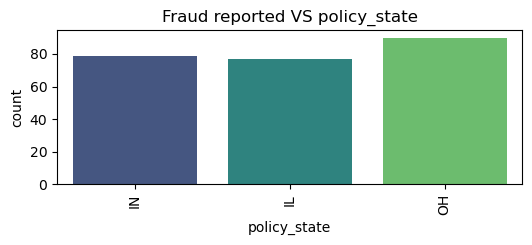

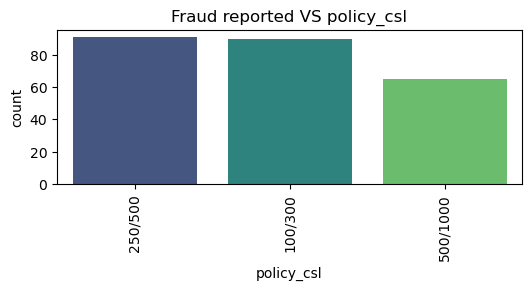

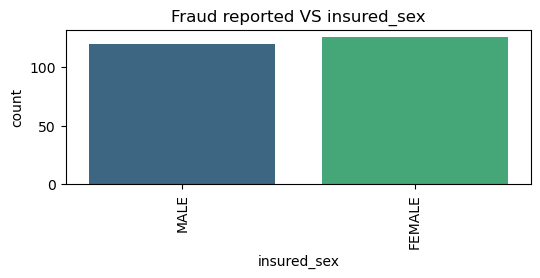

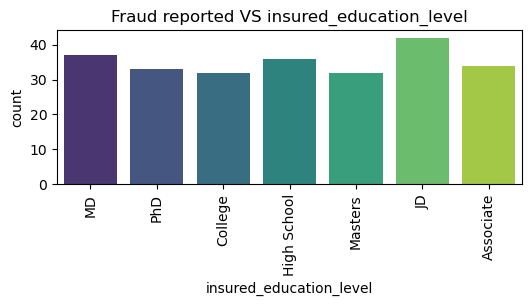

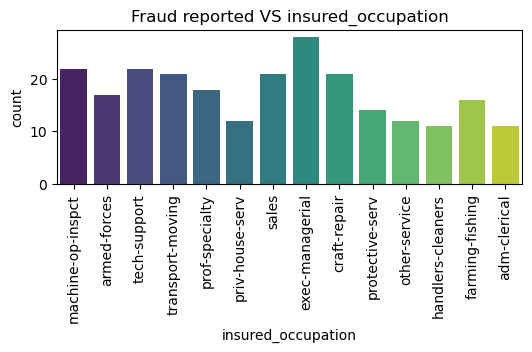

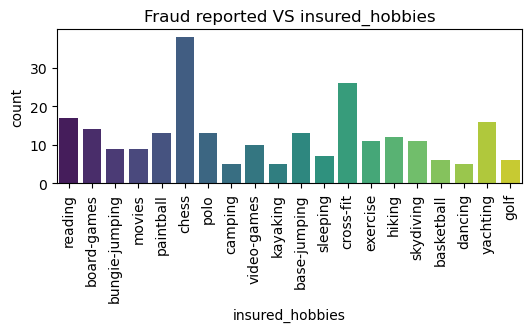

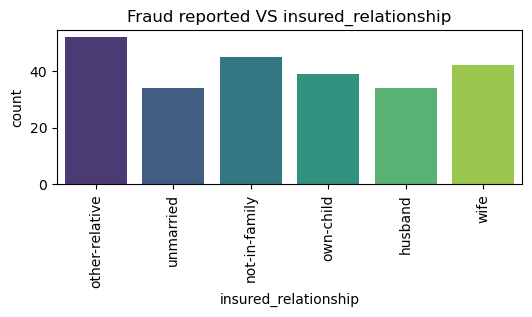

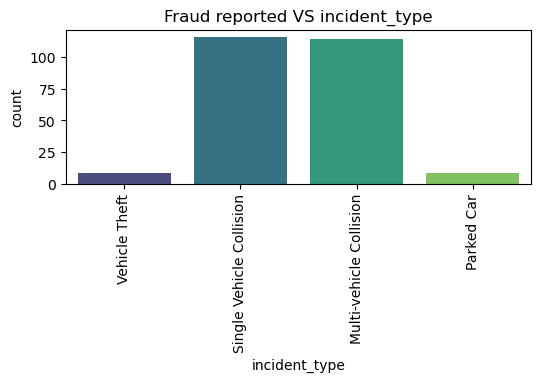

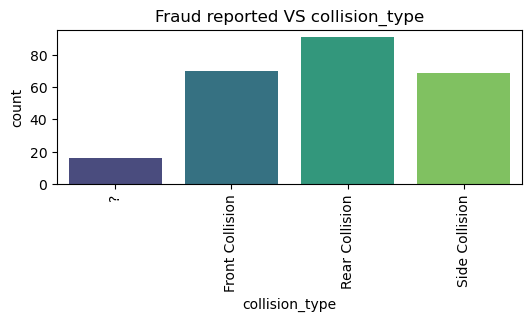

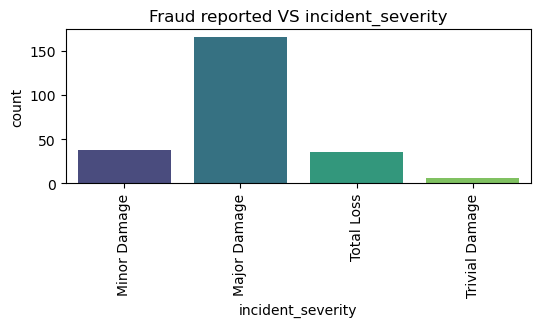

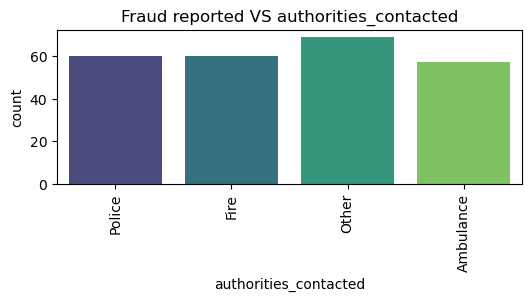

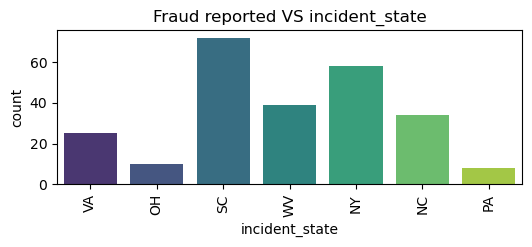

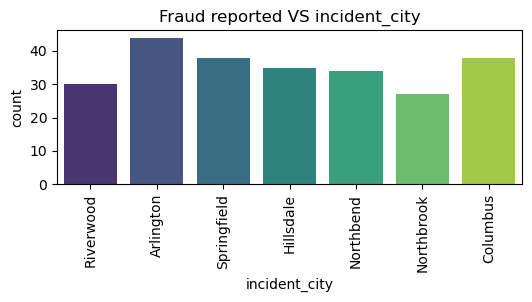

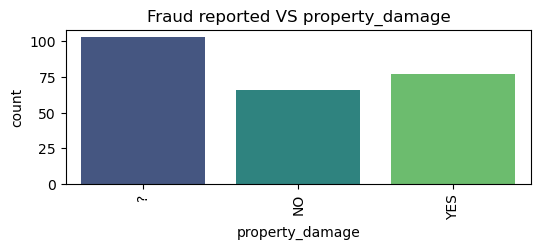

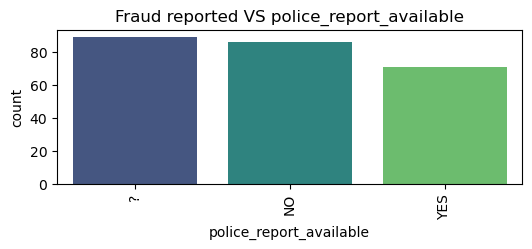

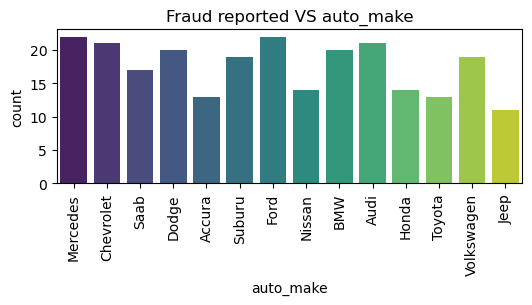

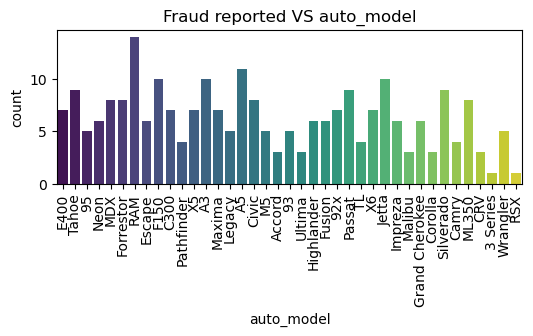

In [58]:
# plot Fraud reported vs categorical features

cat=ins_df1.select_dtypes(include=['object'])
cat1=cat.drop(['policy_bind_date','incident_location'],axis=1)
for i in cat1.columns:
    plt.figure(figsize=(6,2))
    sns.countplot(x=i, data=fraud,palette='viridis')
    plt.title(f'Fraud reported VS {i}')
    plt.xticks(rotation=90)
    plt.show()

Observation:  

    Fraud claim rates are associated with the following patterns:
    
    * Policy state is Ohio state
    * Policy csl is 250/300 or 100/300 
    * Education level is JD
    * Exec-managerial occupation
    * Multi and single vehicle collision - rear collision
    * Major damage reported
    * Most incidents of claim happened in South Carolina state and Arlington city
    * Propert damage was not clear in most cases
    * Police report were mostly not present or were unclear
    * Mercedes and Ford makes were mostly filed for fraud claims
    * Forester model cars were commonly filed 
    

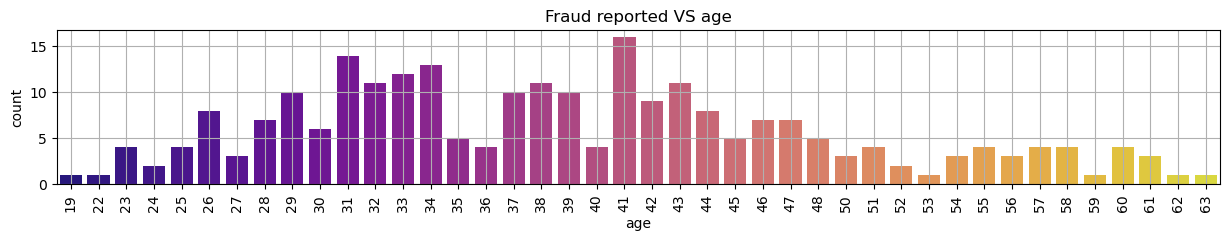

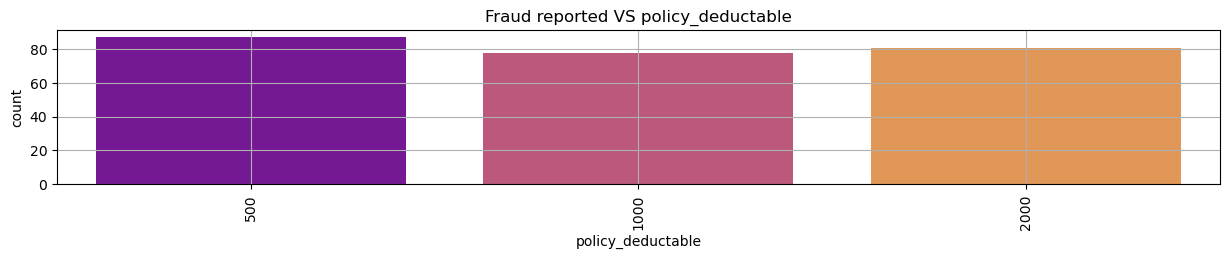

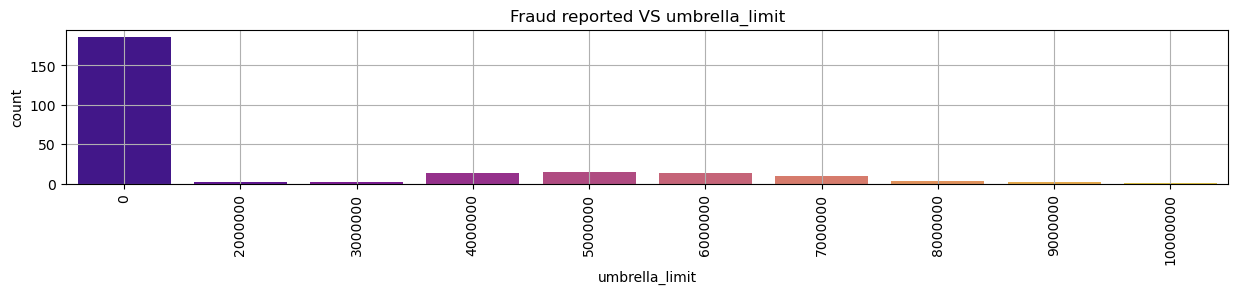

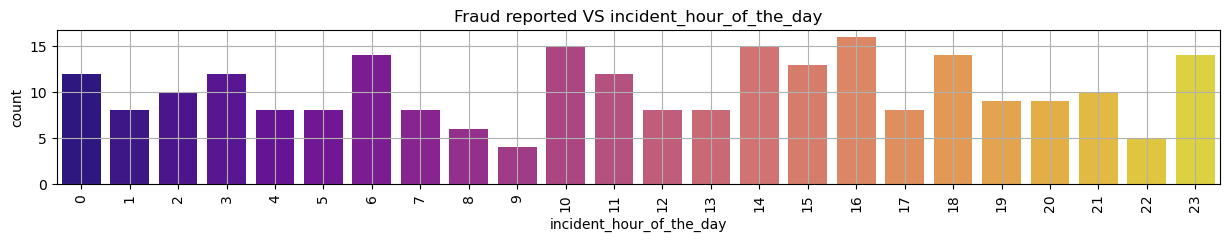

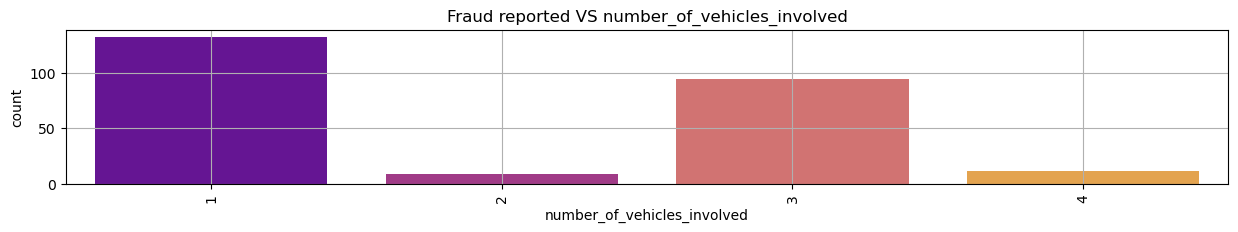

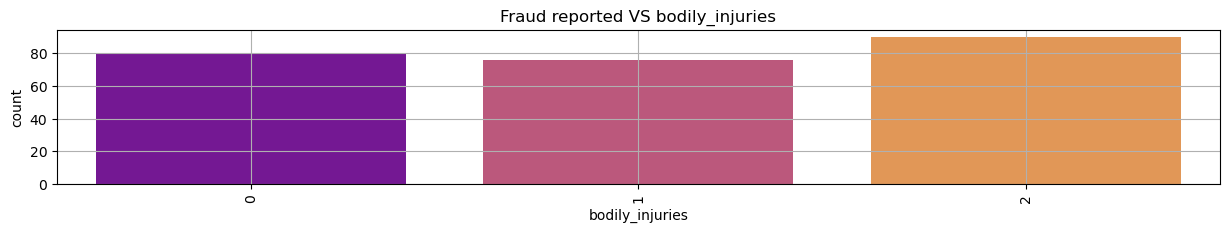

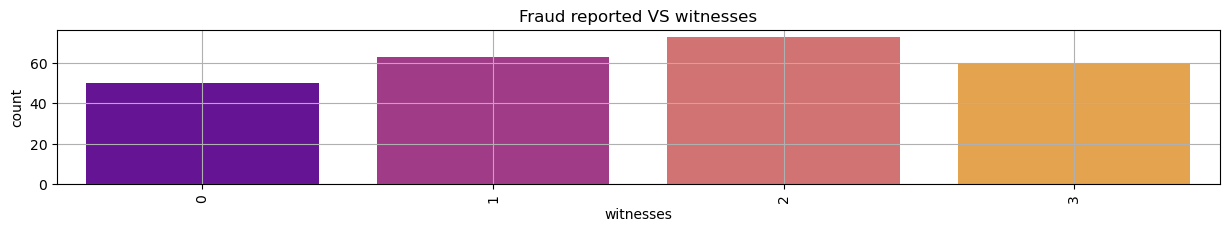

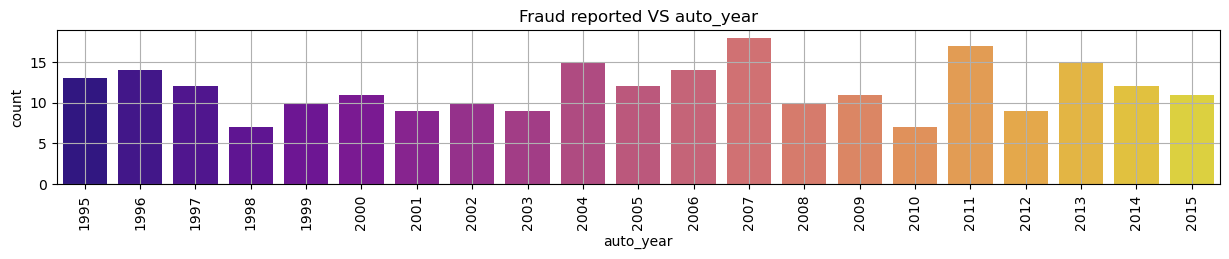

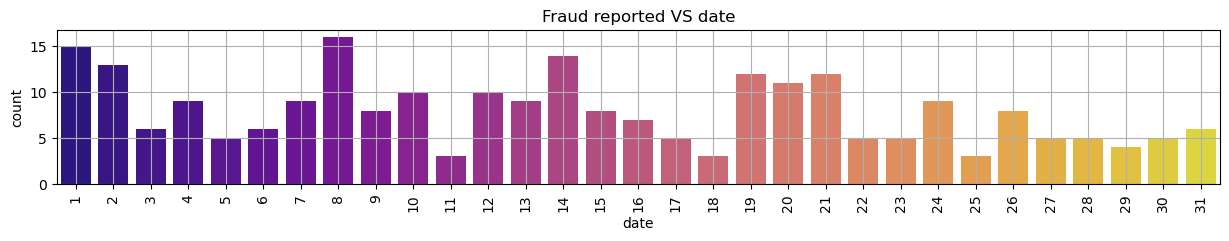

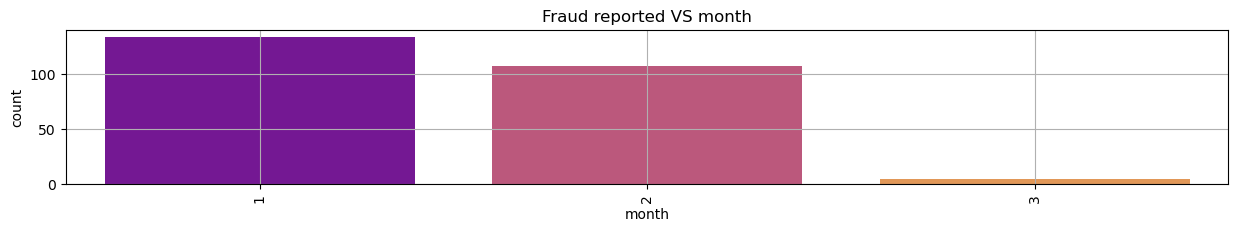

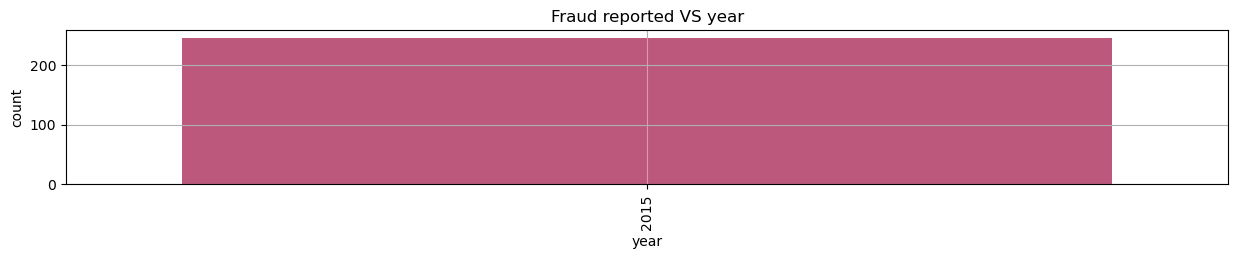

In [73]:
# plot Fraud reported vs numerical features

num=ins_df1.select_dtypes(include=['int','float'])
num1=num.drop(['months_as_customer','policy_annual_premium','insured_zip','capital-gains','capital-loss',
               'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim','fraud_reported'],axis=1)
for i in num1.columns:
    plt.figure(figsize=(15,2))
    sns.countplot(x=i, data=fraud,palette='plasma')
    plt.title(f'Fraud reported VS {i}')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

Observation:  

    Fraud claim rates are associated with the following patterns:
    
    * Most fraud claims were made by customers of age 41 (>15 fraud claims)
    * Policy deductable is 500
    * Umbrella limit is 0
    * Incident hour is 10, 14, 16 
    * Number of vehicles involved is 1
    * Witnesses in most cases were 2
    * Car makes of 2007 were common in fraud claims followed by 2010 makes
    * Most fraud claims were reported on January 2015 

In [75]:
# average claim details of fraud claims

for col in ['months_as_customer','policy_annual_premium','capital-gains','capital-loss',
               'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']:
    print(f'Average {col} in fraud insurance claims is {fraud[col].mean():.2f}')

Average months_as_customer in fraud insurance caims is 207.59
Average policy_annual_premium in fraud insurance caims is 1249.60
Average capital-gains in fraud insurance caims is 24075.20
Average capital-loss in fraud insurance caims is -27634.55
Average total_claim_amount in fraud insurance caims is 60256.14
Average injury_claim in fraud insurance caims is 8215.24
Average property_claim in fraud insurance caims is 8541.99
Average vehicle_claim in fraud insurance caims is 43498.90


In [77]:
# highest and lowest claim details of fraud claims

for col in ['policy_annual_premium','capital-gains','capital-loss',
               'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']:
    print(f'Highest {col} amount in fraud insurance claims is {fraud[col].max():.2f}')
    print(f'Lowest {col} amount in fraud insurance claims is {fraud[col].min():.2f}')
    print()

Highest policy_annual_premium amount in fraud insurance claims is 1935.85
Lowest policy_annual_premium amount in fraud insurance claims is 484.67

Highest capital-gains amount in fraud insurance claims is 91900.00
Lowest capital-gains amount in fraud insurance claims is 0.00

Highest capital-loss amount in fraud insurance claims is 0.00
Lowest capital-loss amount in fraud insurance claims is -91200.00

Highest total_claim_amount amount in fraud insurance claims is 112320.00
Lowest total_claim_amount amount in fraud insurance claims is 2860.00

Highest injury_claim amount in fraud insurance claims is 20700.00
Lowest injury_claim amount in fraud insurance claims is 0.00

Highest property_claim amount in fraud insurance claims is 21810.00
Lowest property_claim amount in fraud insurance claims is 0.00

Highest vehicle_claim amount in fraud insurance claims is 77760.00
Lowest vehicle_claim amount in fraud insurance claims is 2080.00



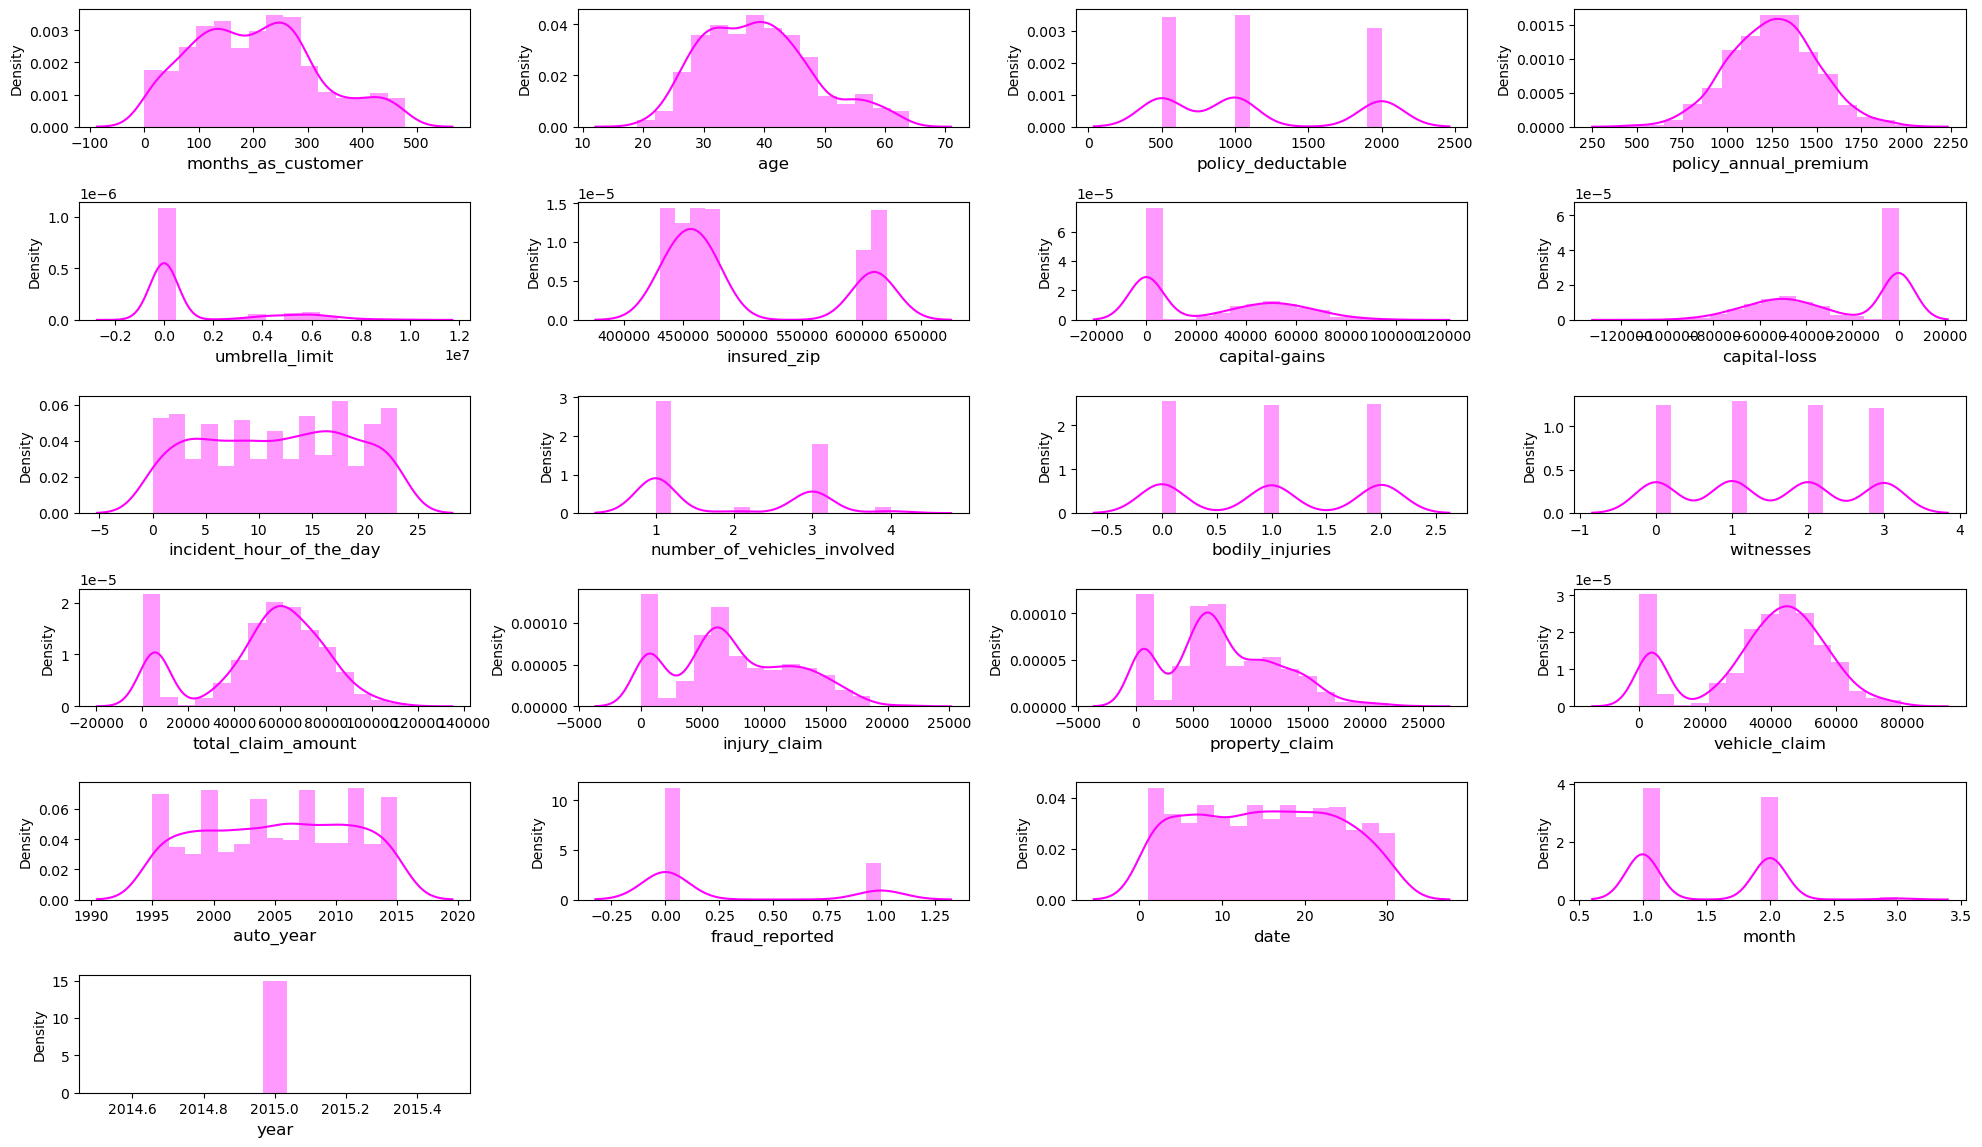

In [86]:
# check data distribution

num=ins_df1.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=len(num):
        ax=plt.subplot(8,4,plot)
        sns.distplot(ins_df1[col],bins=15, color='magenta')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

In [81]:
# check for skewness

num.skew().sort_values(ascending=False)

umbrella_limit                 1.805104
fraud_reported                 1.179766
insured_zip                    0.815086
number_of_vehicles_involved    0.501009
age                            0.481461
capital-gains                  0.481352
policy_deductable              0.477027
property_claim                 0.380670
months_as_customer             0.364615
month                          0.265608
injury_claim                   0.264131
date                           0.041700
witnesses                      0.020923
bodily_injuries                0.014799
policy_annual_premium          0.006022
year                           0.000000
incident_hour_of_the_day      -0.037615
auto_year                     -0.048812
capital-loss                  -0.389813
total_claim_amount            -0.592958
vehicle_claim                 -0.619480
dtype: float64

Observation:  

    Data is normally distributed with acceptable level of skewness

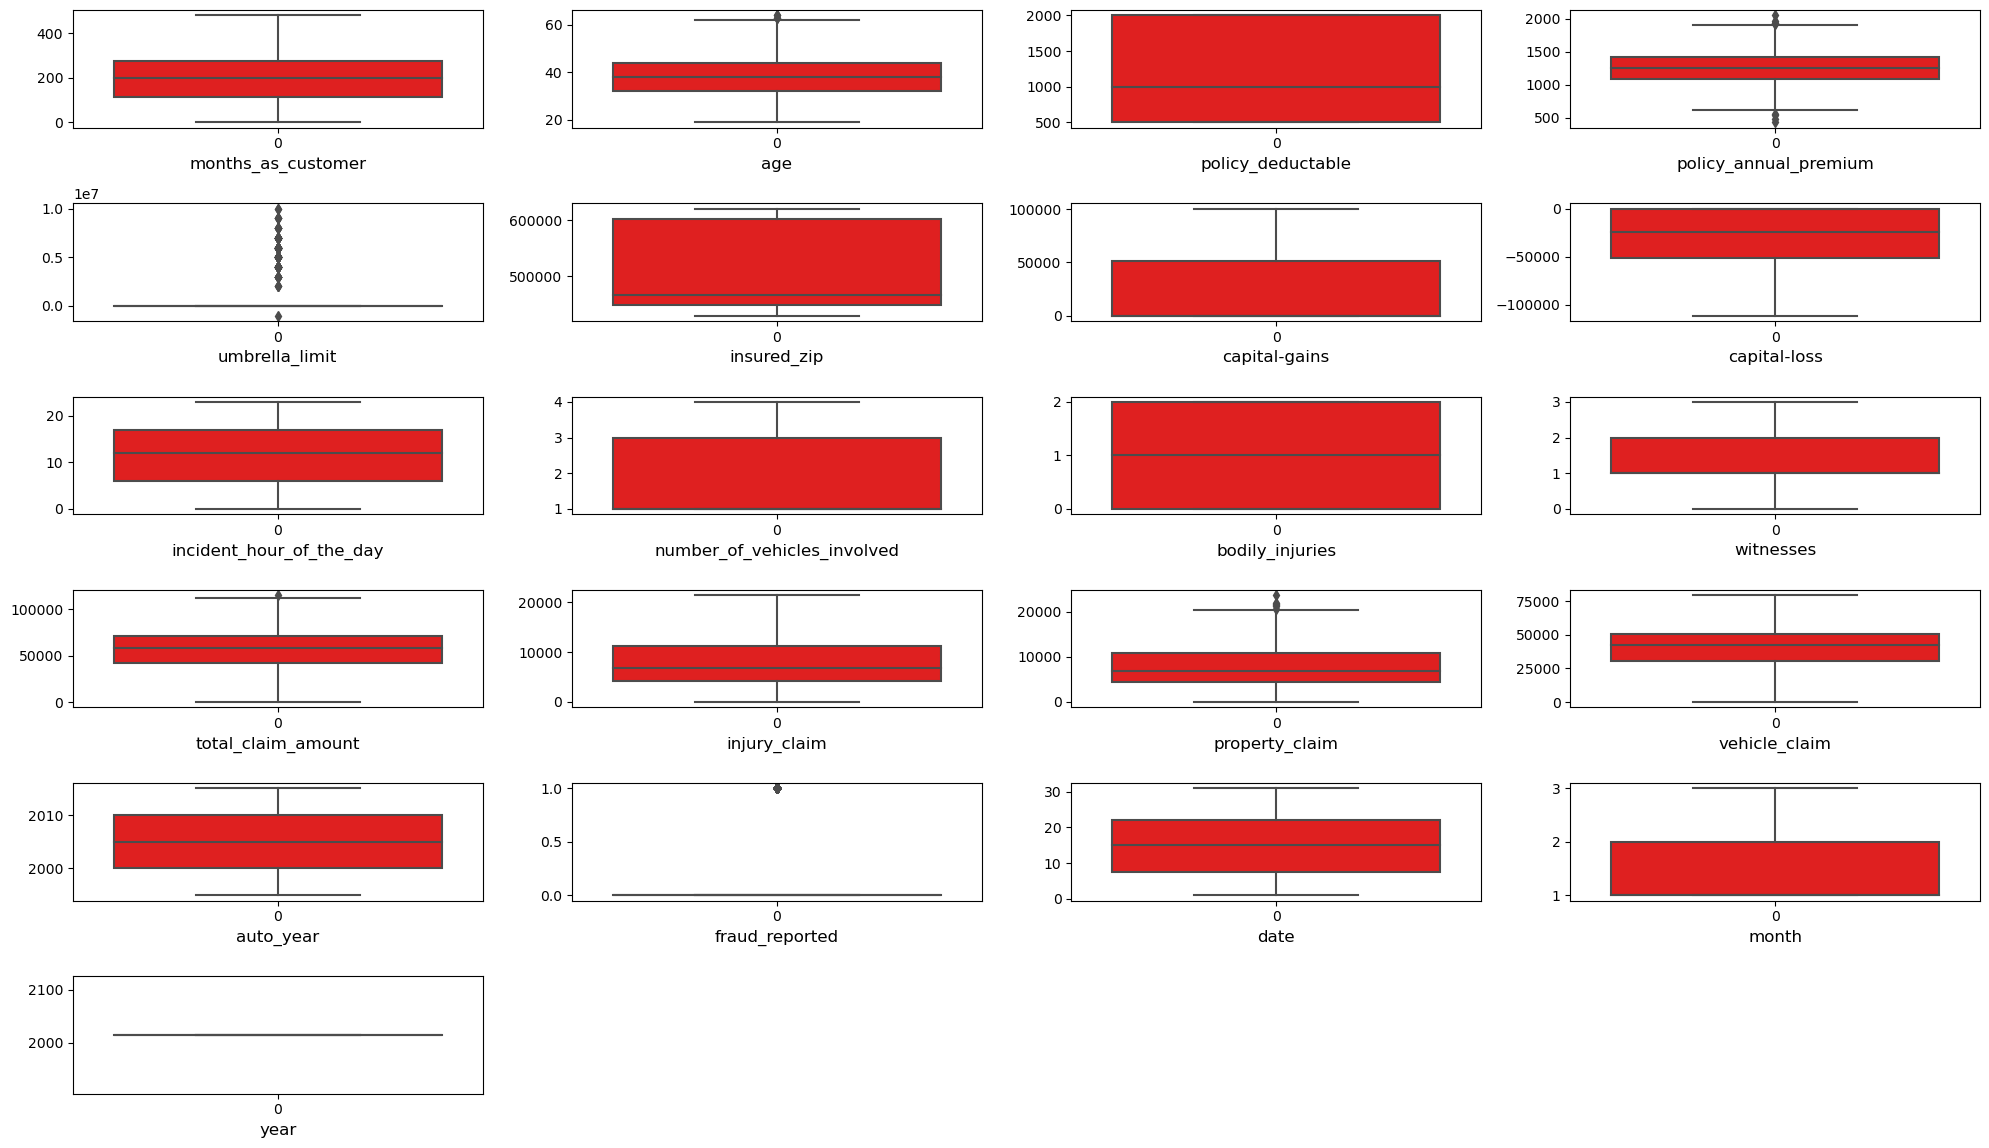

In [85]:
# check for outliers using boxplot

plt.figure(figsize=(20,15))
plot=1
for col in num:
    if plot<=len(num):
        ax=plt.subplot(8,4,plot)
        sns.boxplot(ins_df1[col],color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    There are few outliers in umbrella_limit and policy_annual_premium

In [87]:
# outlier removal by z-score and saving the cleaned dataset as ins_df2

from scipy.stats import zscore

num=['umbrella_limit','policy_annual_premium']
num_cbrt=np.cbrt(ins_df1[num])
z=zscore(num_cbrt)
abs_z=np.abs(z)
filter_z=(abs_z<3).all(axis=1)
ins_df2=ins_df1[filter_z]
ins_df2.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,date,month,year
0,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1,21,1,2015
1,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,22,2,2015
2,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,10,1,2015
3,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,Other,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,17,2,2015
4,256,39,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,1,2,1,2015


In [88]:
print('Size of original dataset',ins.shape)
print('Size of dataset after cleaning and pre-processing',ins_df2.shape)
print('Number of rows removed after cleaning and pre-processing',ins.shape[0]-ins_df2.shape[0])

Size of original dataset (999, 39)
Size of dataset after cleaning and pre-processing (993, 41)
Number of rows removed after cleaning and pre-processing 6


In [90]:
# encode categorical features

cat=ins_df2.select_dtypes(include=['object'])
for col in cat.columns:
    ins_df2[col]=le.fit_transform(ins_df2[col])
    
ins_df2.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,date,month,year
0,228,42,814,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,3,0,1,3,5,5,625,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,21,1,2015
1,134,29,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,2,1,3,1,1,680,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0,22,2,2015
2,256,41,759,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2015-01-10,2,1,0,3,2,0,664,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1,10,1,2015
3,228,44,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,2015-02-17,3,0,1,2,1,0,218,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0,17,2,2015
4,256,39,383,2,1,1000,1351.10,0,478456,0,6,12,3,4,0,0,2015-01-02,0,2,0,1,4,0,886,19,3,1,0,2,1,64100,6410,6410,51280,10,3,2003,1,2,1,2015


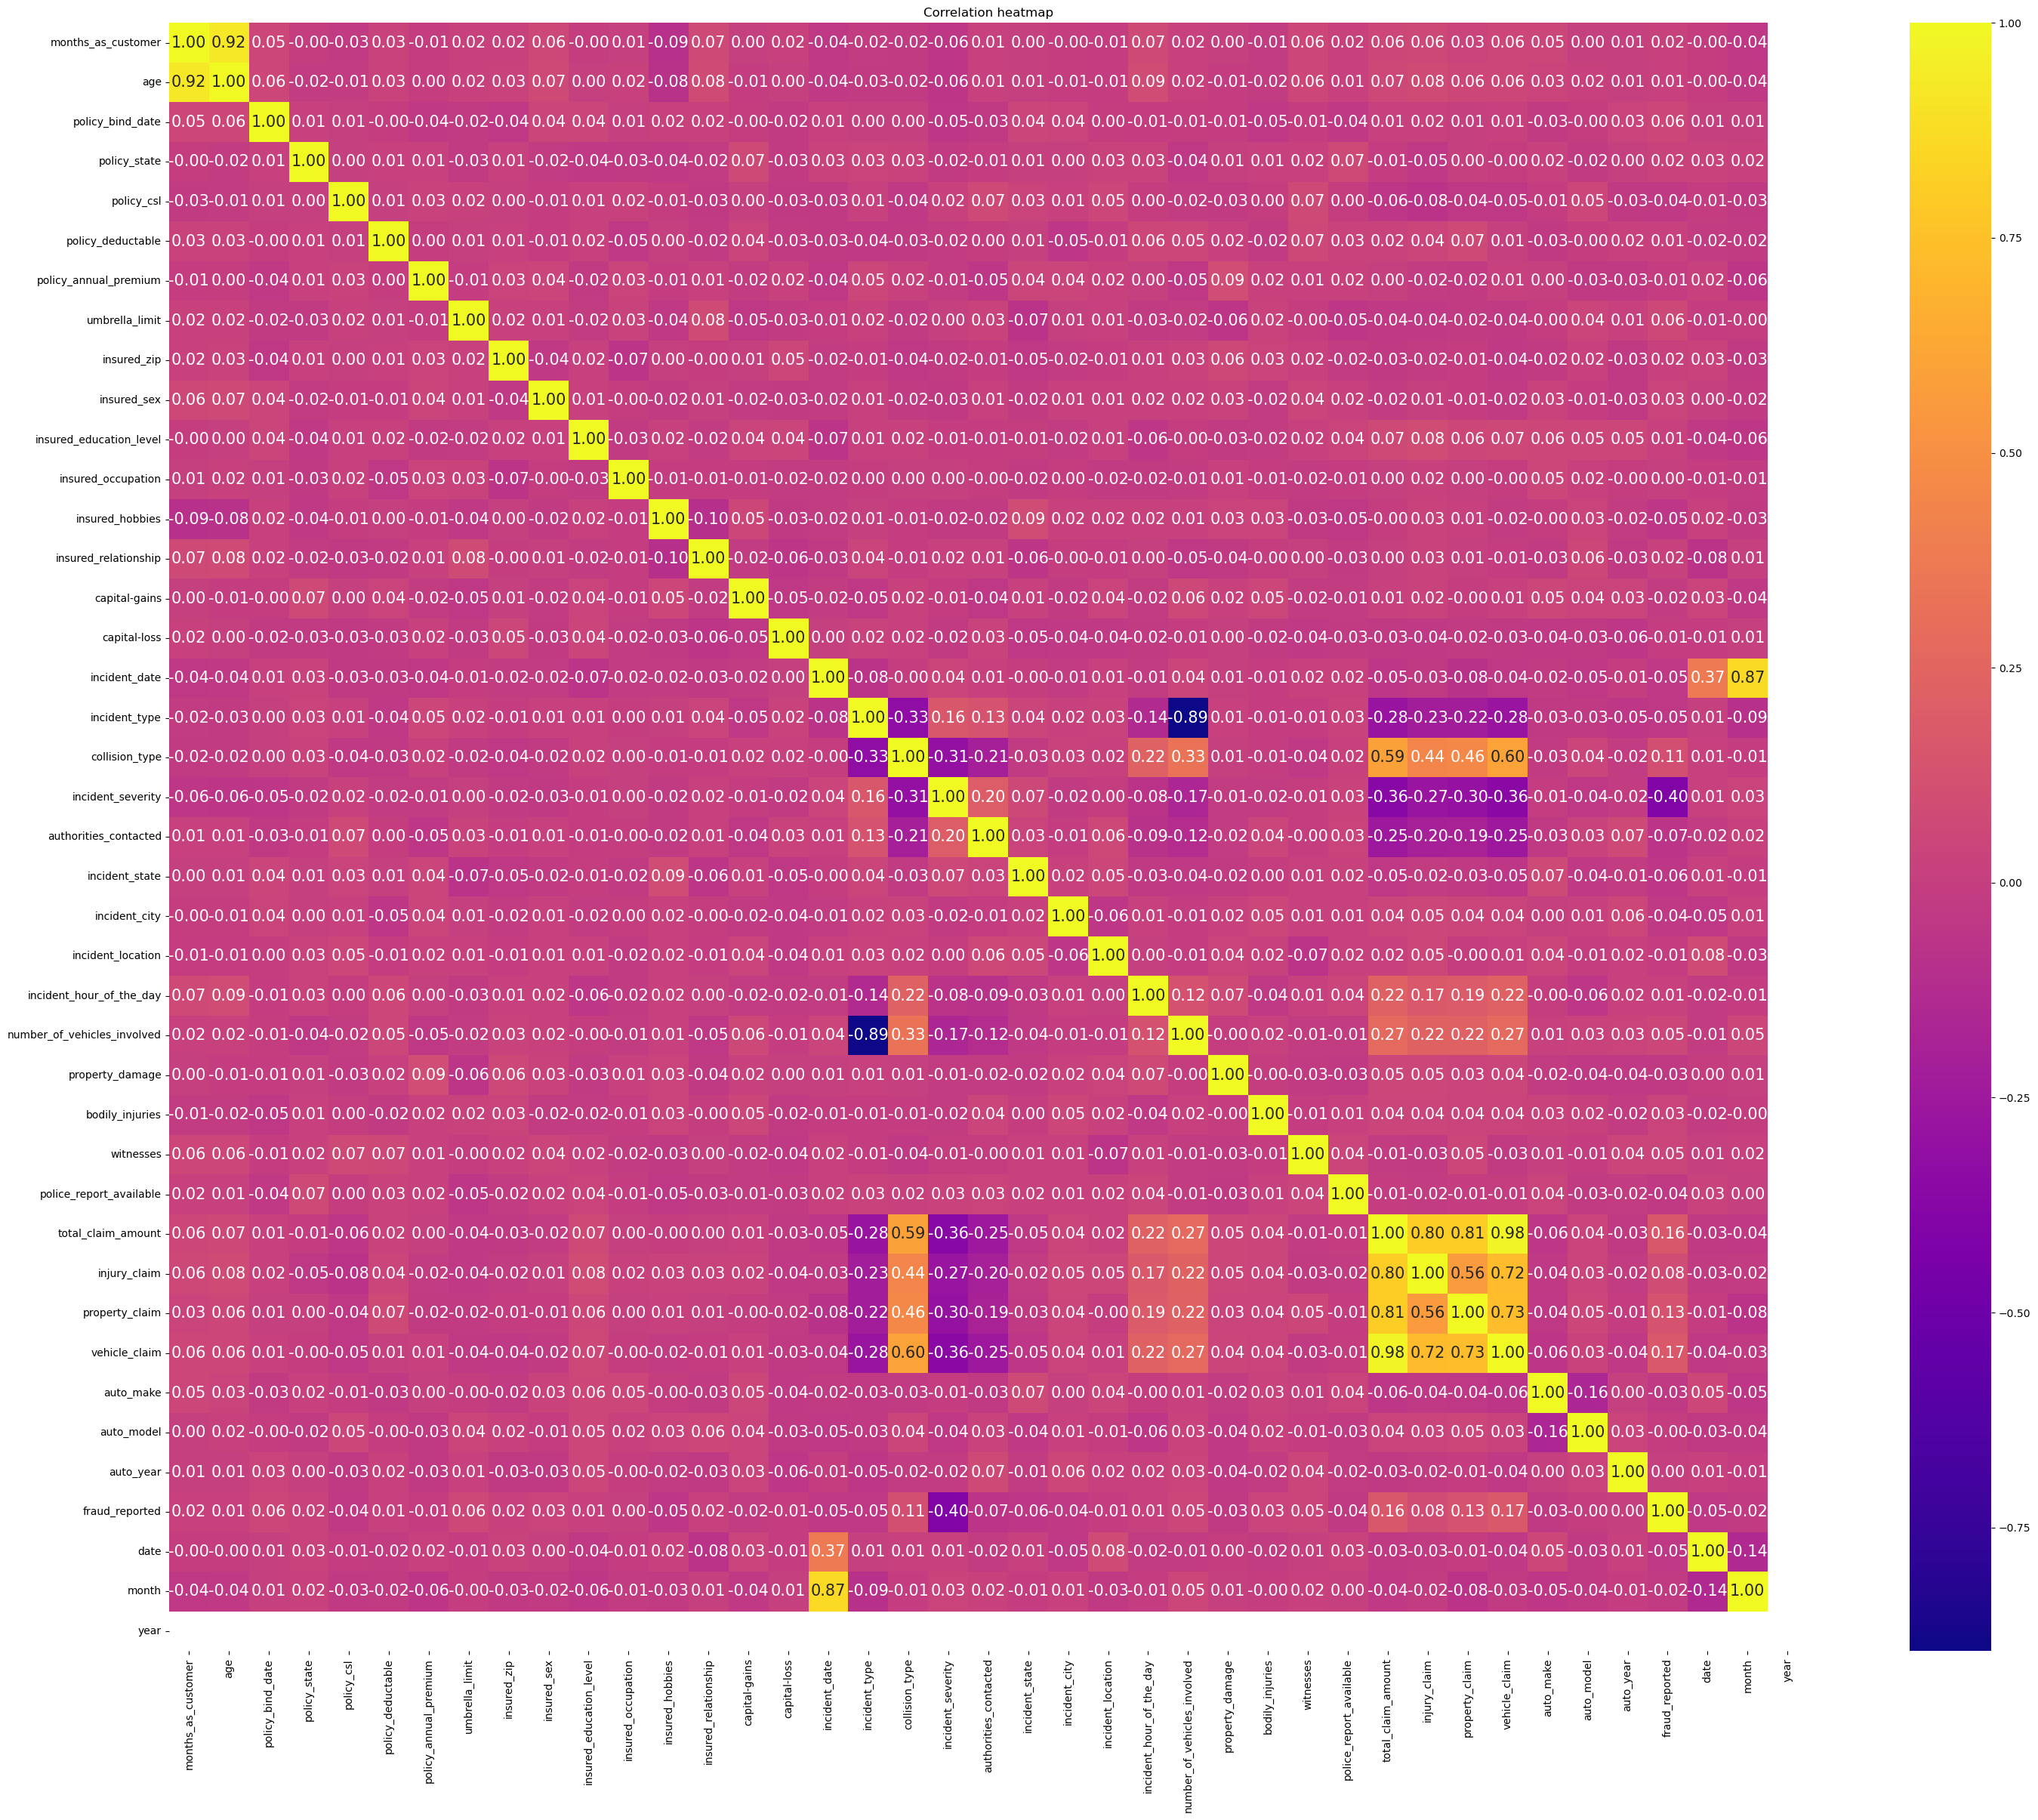

In [96]:
# check for correlation

cm= ins_df2.corr()
plt.figure(figsize=(35,28))

sns.heatmap(cm, annot=True,cmap='plasma',fmt='.2f',annot_kws={'size':15})
plt.title('Correlation heatmap')
plt.show()

Observation:  

    Insurance claim status/fraud_reported has moderate negative correlation with incident severity (-0.40)
    
    High Multicollinearity (> 0.80) is observed between:
        incident type and anumber of vehicles involved (-0.89)
        incident date and month (0.87) 
        total claim amount with vehicle claim (0.98), property claim (0.81) and injury claim (0.80) 
        

In [103]:
ins_df2.drop('incident_date',axis=1,inplace=True)

# Feature Selection

In [142]:
x=ins_df2.drop('fraud_reported',axis=1)
y=ins_df2['fraud_reported']

In [143]:
# scale the features(x)

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [192]:
# split data to train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=99)

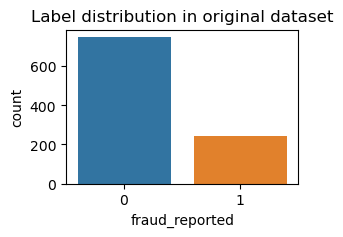

In [151]:
# checking for data imbalance

plt.figure(figsize=(3,2))
sns.countplot(x='fraud_reported',data=ins_df2)
plt.title('Label distribution in original dataset')
plt.show()

In [149]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(x_train,y_train)

Text(0.5, 1.0, 'Label distribution after oversampling')

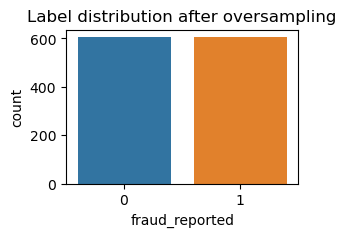

In [230]:
Ytrain_df=pd.DataFrame(Y_train,columns=['fraud_reported'])
plt.figure(figsize=(3,2))
sns.countplot(x='fraud_reported', data=Ytrain_df)
plt.title('Label distribution after oversampling')

# MODEL BUILDING & VALIDATION

In [194]:
# define functions for training and evaluation of models

def score(model,x_train,y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(x_train)
        print('Accuracy of train set: ',accuracy_score(y_train,y_pred1))
    else:
        y_pred2= model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(y_test,y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='YlGnBu',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted Glass Type')
        plt.ylabel('Actual Glass Type')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,x_pca,y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')

Accuracy of train set:  0.5882838283828383
Accuracy of test set:  0.5879396984924623

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.79      0.58      0.67       144
           1       0.35      0.60      0.45        55

    accuracy                           0.59       199
   macro avg       0.57      0.59      0.56       199
weighted avg       0.67      0.59      0.61       199



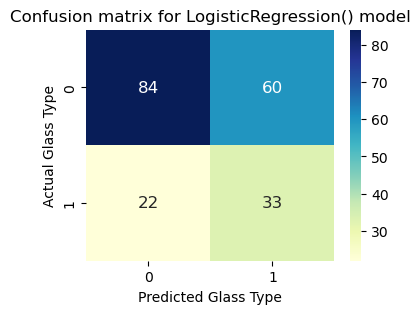


Cross validation score of the LogisticRegression() model : 0.7633571899903557


In [195]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,x_test,y_test,train=True)
score(lr,X_train,Y_train,x_test,y_test,train=False)

cv(lr)

Accuracy of train set:  1.0
Accuracy of test set:  0.678391959798995

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.78      0.78      0.78       144
           1       0.42      0.42      0.42        55

    accuracy                           0.68       199
   macro avg       0.60      0.60      0.60       199
weighted avg       0.68      0.68      0.68       199



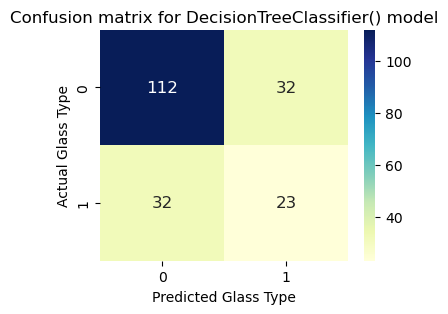


Cross validation score of the DecisionTreeClassifier() model : 0.6677224506370235


In [196]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,x_test,y_test,train=True)
score(dt,X_train,Y_train,x_test,y_test,train=False)
cv(dt)

Accuracy of train set:  1.0
Accuracy of test set:  0.7688442211055276

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.80      0.92      0.85       144
           1       0.64      0.38      0.48        55

    accuracy                           0.77       199
   macro avg       0.72      0.65      0.66       199
weighted avg       0.75      0.77      0.75       199



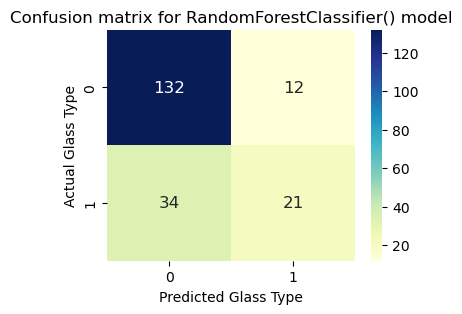


Cross validation score of the RandomForestClassifier() model : 0.7603319628445258


In [197]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,x_test,y_test,train=True)
score(rf,X_train,Y_train,x_test,y_test,train=False)
cv(rf)

Accuracy of train set:  0.5132013201320133
Accuracy of test set:  0.7035175879396985

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.76      0.86      0.81       144
           1       0.44      0.29      0.35        55

    accuracy                           0.70       199
   macro avg       0.60      0.58      0.58       199
weighted avg       0.67      0.70      0.68       199



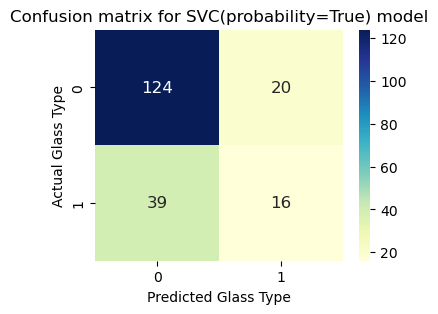


Cross validation score of the SVC(probability=True) model : 0.7462463834323131


In [198]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,x_test,y_test,train=True)
score(svc,X_train,Y_train,x_test,y_test,train=False)
cv(svc)

Accuracy of train set:  0.9702970297029703
Accuracy of test set:  0.7939698492462312

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.84      0.88      0.86       144
           1       0.65      0.56      0.60        55

    accuracy                           0.79       199
   macro avg       0.74      0.72      0.73       199
weighted avg       0.79      0.79      0.79       199



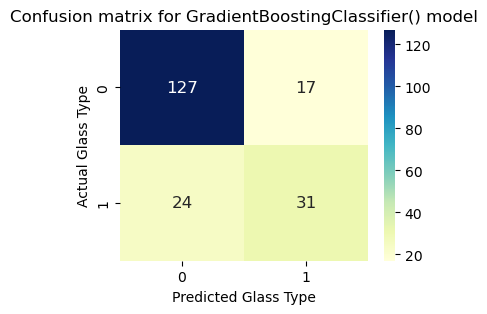


Cross validation score of the GradientBoostingClassifier() model : 0.7603167351911071


In [199]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,x_test,y_test,train=True)
score(gbc,X_train,Y_train,x_test,y_test,train=False)
cv(gbc)

Accuracy of train set:  1.0
Accuracy of test set:  0.8241206030150754

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model  :

               precision    recall  f1-score   support

           0       0.87      0.90      0.88       144
           1       0.70     

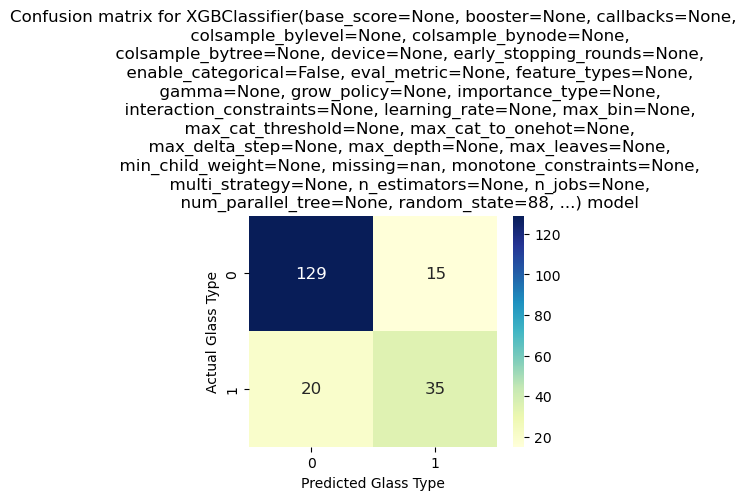


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model : 0.7522663824171362


In [224]:
# XGBoost
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=88)
xg.fit(X_train,Y_train)

score(xg,X_train,Y_train,x_test,y_test,train=True)
score(xg,X_train,Y_train,x_test,y_test,train=False)
cv(xg)

F1 score of Logistic Regression model is  0.445945945945946
F1 score of Decision Tree model is  0.43809523809523804
F1 score of Random Forest model is  0.4883720930232559
F1 score of SVC model is  0.3516483516483517
F1 score of Gradient Boosting model is  0.6019417475728155
F1 score of XGBoosting model is  0.6666666666666666


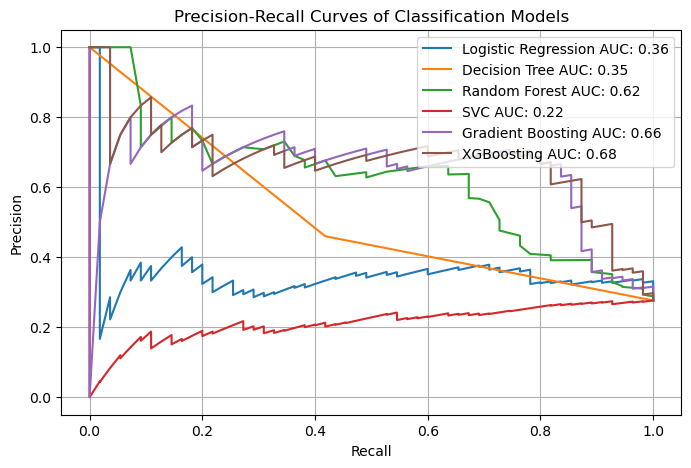

In [201]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'Decision Tree': dt, 'Random Forest': rf,'SVC': svc,
          'Gradient Boosting': gbc,'XGBoosting':xg}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observation:  

    We select XGBClassifier (xg) as the best model with respect to its test accuracy (0.824) and it can classify fraud claims with comparitively less number of false negatives. The model shows:-
    
        Accuracy of train set:  1.0
        Accuracy of test set:  0.824
        Cross validation score : 0.752
        F1 score : 0.66
        AUC : 0.68
        
        

In [202]:
# Hyperparameter tuning of the selected XGBClassifier  (xg) model using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators': [50,100,150,200,250],'learning_rate': [0.001,0.01,0.1,1],'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],'min_samples_leaf': [1,2,4],}

rs=RandomizedSearchCV(estimator=xgb.XGBClassifier(),param_distributions=params,scoring='accuracy',cv=5)

rs.fit(X_train,Y_train)

print(f'Best parameters for Random Forest model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for Random Forest model: {'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.1} and best score is : 0.871455293677516


Accuracy of train set:  1.0
Accuracy of test set:  0.8391959798994975

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, min_samples_leaf=4, min_samples_split=4,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=350, n_jobs=None, ...) model  :

               precision    recall  f1-score   support

           0       0.87      0.92      0.89       144
           1       0.74      0.6

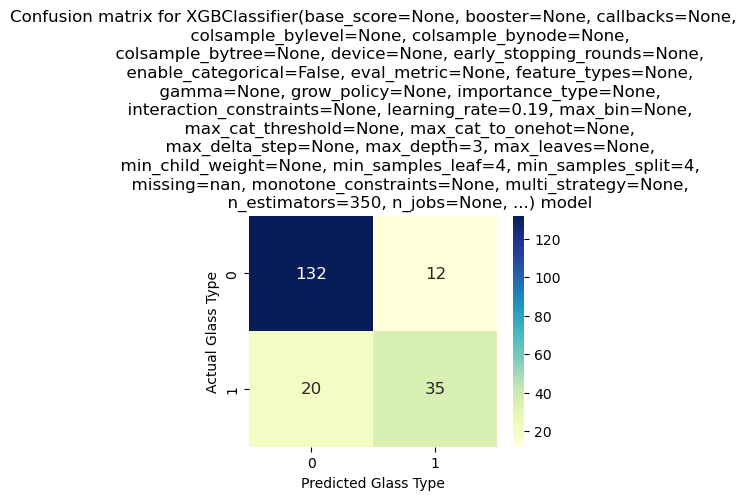


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, min_samples_leaf=4, min_samples_split=4,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=350, n_jobs=None, ...) model : 0.7673772904928684


In [221]:
# Tuned XGBClassifier (also with manual tuning)

xg1=xgb.XGBClassifier(n_estimators=350, min_samples_split= 4, min_samples_leaf= 4, max_depth= 3, 
                                learning_rate= 0.19)
xg1.fit(X_train,Y_train)

score(xg1,X_train,Y_train,x_test,y_test,train=True)
score(xg1,X_train,Y_train,x_test,y_test,train=False)
cv(xg1)

F1 score of XGBClassifier model is  0.6666666666666666
F1 score of Tuned XGBClassifier model is  0.6534653465346534


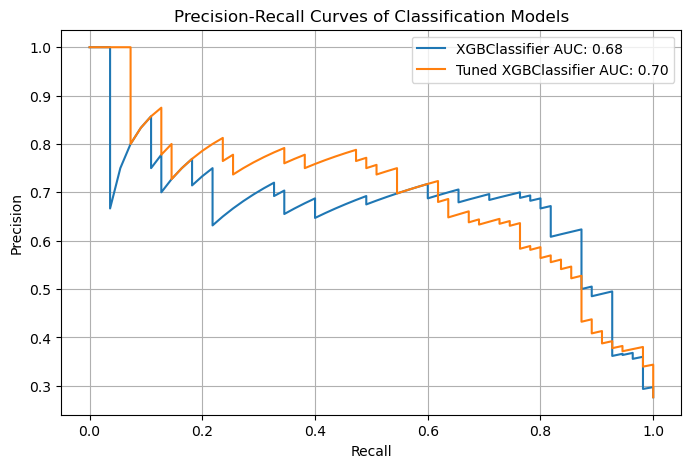

In [226]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'XGBClassifier': xg,'Tuned XGBClassifier': xg1}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observation:  

    There has been improvement in test accuracy, AUC and cross-validation score after hyperparameter tuning. Tuned model also classified less false positives. So we'll proceed with the tuned XGBClassifier model model having:
    
        Accuracy of train set:  1.0
        Accuracy of test set:  0.839
        Cross validation score : 0.767
        F1 score : 0.653
        AUC : 0.70

        Overfitting has reduced slightly after tuning as the difference between train and test accuracy decreased.

In [227]:
# Save XGBClassifier model

pickle.dump(xg1, open('Insurance_Fraud_prediction_xg1_model.pkl','wb'))

In [229]:
# load model and view prediction vs actual fraud_status

Insurance_Fraud_prediction_model=pickle.load(open('Insurance_Fraud_prediction_xg1_model.pkl','rb'))
y_pred=Insurance_Fraud_prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result.head()

,Predicted,Actual
541,0,0
611,0,0
595,0,0
484,0,0
697,0,0


Observation:  

    The XGBClassifier model (xg1) was able to predict if an insurance claim is fraudulent or not based on many features with 84% test accuracy.

# Overall Summary

The dataset on " Insurance Claim Fraud Detection" was used to analyse and build machine learning models to predict if an insurance claim is fraudulent or not, on the basis of the details provided in the dataset(Classification model).

Actions done with the dataset:  
1. Data cleaning - removal of unwanted columns, renaming of columns, outlier removal, managing skewness 
2. Exploratory Data Analysis - descriptive and graphical analysis of data
3. Feature Engineering -  generating new columns, scaling of data,categorical encoding
4. Model training and evaluation- trained 6 models for the classification problem; evaluated the models using appropriate metrics to find the best model


# Data Insights

    DESCRIPTIVE ANALYSIS:

    Out of 999 cases, 246 insurance claim frauds were reported
    Rate of genuine insurance claim: 75.38%
    Rate of fraud insurance claim: 24.62%
    In most cases, umbrella_limit is zero.There wont be any extra insurance that provides protection beyond existing limits and coverages of other policies
    Dataset represents male and female population equally. No gender bias will affect the data analysis.
    Capital gain and loss of clients are 0 in most cases
    Majority claims where made by customers on 02-02-2015 (28 claims)
    Multi-vehicle and single vehicle Collisions are the common incidents reported by clients for insurance claim out of which rear collisions are most commonly reported
    In most cases, minor damage was reported
    The type of claim/vehicle damage made by customer were mostly reported from Springfield, NY
    In 580 cases, single vehicle was involved in the damage
    Average age of customers who have claimed for insurance is 38.93 yrs having range of 19-64 yrs
    Average policy_deductable (the amount of money that a customer is responsible for paying toward an insured loss) is 1136.1
    Average policy_annual_premium is 1256.25
    Average total_claim_amount is 52743.07
    

    INFERENTIAL ANALYSIS:
    
    Customer with policy_number - 214618 has bagged the highest insurance claim of 114920 which was claimed on 15-02-2015. Insurance was claimed for Multi-vehicle Front Collision involving 3 vehicles at Springfield, NY on 21 st hour of the day (night time) and major damage was done to her Audi A3 (2006 make). The case was genuine and not a fraud claim.
    
    Customer with policy_number - 266247 has bagged the lowest insurance claim of 100 which was claimed on 23-01-2015. Insurance was claimed for Trivial Damage to her parked car (Audi A3 (2002 make)) at West Virginia on 5th hour of the day (early morning). The case was genuine and not a fraud claim.
    
    Frauds were reported more when umbrella_limit was high, capital_gains were less, more vehicles are involved, total claim amount is high, injury claim is high, vehicle claim is high, property claim is high.
    
    Fraud claim rates are associated with the following patterns:
    
    * Policy state is Ohio state
    * Policy csl is 250/300 or 100/300 
    * Education level is JD
    * Exec-managerial occupation
    * Multi and single vehicle collision - rear collision
    * Major damage reported
    * Most incidents of claim happened in South Carolina state and Arlington city
    * Propert damage was not clear in most cases
    * Police report were mostly not present or were unclear
    * Mercedes and Ford makes were mostly filed for fraud claims
    * Forester model cars were commonly filed 
    * Most fraud claims were made by customers of age 41 (>15 fraud claims)
    * Policy deductable is 500
    * Umbrella limit is 0
    * Incident hour is 10, 14, 16 
    * Number of vehicles involved is 1
    * Witnesses in most cases were 2
    * Car makes of 2007 were common in fraud claims followed by 2010 makes
    * Most fraud claims were reported on January 2015
    
    
    Highest policy_annual_premium amount in fraud insurance claims is 1935.85
    Lowest policy_annual_premium amount in fraud insurance claims is 484.67
    
    Highest total_claim_amount amount in fraud insurance claims is 112320.00
    Lowest total_claim_amount amount in fraud insurance claims is 2860.00


    Highest injury_claim amount in fraud insurance claims is 20700.00
    Lowest injury_claim amount in fraud insurance claims is 0.00

    Highest property_claim amount in fraud insurance claims is 21810.00
    Lowest property_claim amount in fraud insurance claims is 0.00

    Highest vehicle_claim amount in fraud insurance claims is 77760.00
    Lowest vehicle_claim amount in fraud insurance claims is 2080.00





# Selected model


    XGBClassifier  model was found to be the best model for the classification task to predict if an insurance claim is fraudulent or not. The model was selected based on below metrics:

        Accuracy of train set:  1.0
        Accuracy of test set:  0.839
        Cross validation score : 0.767
        F1 score : 0.653
        AUC : 0.70


        There is minimal overfitting than the untuned XGBClassifier model. Number of False Negatives are also lesser.
   